<a href="https://colab.research.google.com/github/MJAHMADEE/Industrial_Control_Course/blob/main/Frequency_Domain_Control_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5.1 Getting Started with Transfer Functions

The [Python Control Systems Library](https://github.com/python-control/python-control) provides basic tools for the analysis and design of linear feedback control systems. The library provides tools to specify transfer function and state space models, manipulate models using block diagram algebra, stability analysis, and perform time and frequency domain simulation.

The purpose of these notes is to provide a quick start with the Python Control Systems Library. Consult the [Python Control Systems Documentation](http://python-control.readthedocs.io/en/latest/) for more details.

## 5.1.1 Installation

The [Python Control Systems Library](https://github.com/python-control/python-control) is not, unfortunately, a standard part of most standard Python distributions. On most systems, the following commands will perform the required one-time installation of the necessary software.

In [ ]:
!pip install slycot
!pip install control

## 5.1.2 Library Usage

The control systems library is designed to work with a simplified syntax where libraries are imported without the standard prefixes.  

In [ ]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import control.matlab as control

## 5.1.3 Demonstration

### 5.1.3.1 Step Response of Transfer Functions

The following cells demonstrate the use of two functions in the control systems library, `tf` and `step`. Suppose a signal $y(s)$ is related to an input $u(s)$ by the formula

$$y(s) = \underbrace{\frac{4.3}{3.2s + 1}}_{G(s)} u(s)$$

The transfer function

$$G(s) = \frac{4.3}{3.2 s + 1}$$

is represented in the control system libary using `tf(num,den)` where `num` and `den` list the coefficients of the numerator and denominator polynomials.  

In [ ]:
G = control.tf([4.3],[3.2, 1])
print(G)


   4.3
---------
3.2 s + 1



The step response is created and plotted as

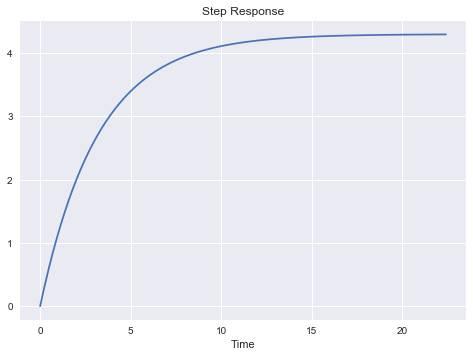

In [ ]:
y,t = control.step(G)
plt.plot(t,y)
plt.xlabel('Time')
plt.title('Step Response')

### 5.1.3.2 Transfer Functions in Series

Models for complex systems are generally constructed by combining models of simpler elements. Consider, for example, a serial connection of two transfer functions

$$ y_1(s) = G_1(s) u(s)$$

$$ y_2(s) = G_2(s) y_1(s)$$

which can be diagrammed as

$$u(s) \longrightarrow \boxed{\\G_1(s)} \stackrel{y_1(s)}{\longrightarrow} \boxed{\\G_2(s)} 
\longrightarrow y_2(s)$$

The serial composition of two transfer functions can be written

$$y_2(s) = \underbrace{G_2(s)G_1(s)}_{G(s)} u(s)$$

where the product $G(s) = G_2(s)G_1(s)$ represents the transfer function of the combined system. In terms of a block diagram

$$u(s) \longrightarrow \boxed{\\G_1(s)} \stackrel{y_1(s)}{\longrightarrow} \boxed{\\G_2(s)} 
\longrightarrow y_2(s) \qquad \implies \qquad
u(s) \longrightarrow \boxed{\\G_2(s)G_1(s)} \longrightarrow y_2(s)$$

The product $G(s) = G_2(s)G_1(s)$$ is computed by taking the products of the numerator and denominator polynomials, respectively.  For example, suppose

$$G_1(s) = \frac{12.3}{10 s + 1} \text{   and   }G_2(s) = \frac{4}{15 s + 1}$$

Then

\begin{align*}
G(s) & = G_2(s)G_1(s) \\
& = \frac{4}{15 s + 1} \times \frac{12.3}{10 s + 1} = \frac{4 \times 12.3}{(15s + 1)(10s + 1)} = \frac{49.2}{150 s^2 + 25s + 1}
\end{align*}

We can verify this calculation using the control systems library.


       49.2
------------------
150 s^2 + 25 s + 1



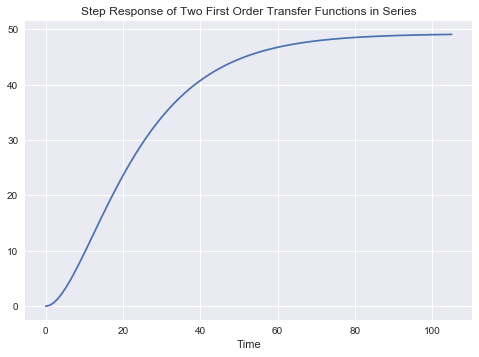

In [ ]:
G1 = control.tf([12.3],[10,1])
G2 = control.tf([4],[15,1])

G = G2 * G1

print(G)

y,t = control.step(G)
plt.plot(t,y)
plt.xlabel('Time')
plt.title('Step Response of Two First Order Transfer Functions in Series')

### 5.1.3.3 Second Order Transfer Functions

The control systems library is particularly helpful when working with second and higher order transfer functions. For

$$G(s) = \frac{3}{4s^2 + s + 1}$$




      3
-------------
4 s^2 + s + 1



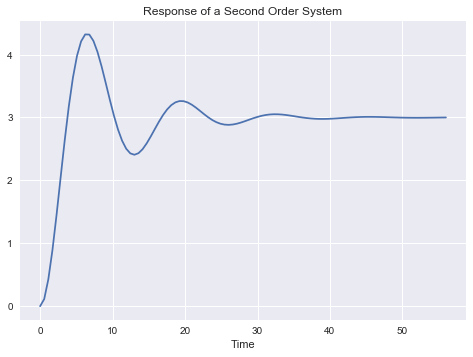

In [ ]:
R = control.tf([3.],[4.,1.,1.])
print(R)

y,t = control.step(R)
plt.plot(t,y)
plt.xlabel('Time')
plt.title('Response of a Second Order System')

# 5.2 Closed-Loop Transfer Functions for Car Cruise Control
    

## 5.2.1 Summary

Block diagrams allow you to visualize the flow of information in complex dynamical systems. Using simple elements, it is possible to create models to study the relationship between control structure, process response, and control action.

The purpose of this notebook is to introduce for the analysis of block diagrams made up of linear transfer functions. 

## 5.2.2 Block Diagram for Car Cruise Control

Let's imagine you own a car with a mass of 1,500 kg (including passengers) that is traveling down a level stretch of highway at a desired speed of 100 kilometers per hour. You wish to design a cruise controller that will adjust the throttle position $u$ within the limits 0 to 1 in order to maintain constant speed. 

A block diagram for this system is shown in the following sketch:

![Cruise Control Block Diagram](figures/CruiseControl.png)

The disturbance to the system is a change in road grade measured in percent.  (A one percent grade corresponds to 1 foot of rise in 100 feet of horizontal travel, or a tangent of 0.01).  The dynamics are represented by three transfer functions denoting the response of the engine torque to throttle position,

$$G_e = \frac{600}{s + 1}$$

the response of the vehicle to engine and external forces, 

$$G_v = \frac{0.5}{5s + 1}$$

and the dynamics of the speed measurement,

$$G_m = \frac{1}{0.2s + 1}$$

We assume that a one percent increase in grade introduces 150 Newtons of force in opposing the car acceleration, that is

$$G_d = 150$$

The controller is assumed to be a proportional-integral control written as

$$G_c = K_c\left(1 + \frac{1}{\tau_I s}\right)$$

This can be summarized in the following block diagram

![Cruise Control Block Diagram](figures/CruiseControl2.png)

In [ ]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import control.matlab as control

# control constants
Kc = 0.01
tauI = 10

# control transfer function
Gc = Kc*control.tf([tauI,1],[tauI,0])

# model transfer functions
Gd = control.tf([150],[1])
Ge = control.tf([600],[1,1])
Gv = control.tf([0.5],[5,1])
Gm = control.tf([1],[0.2,1])

## 5.2.3 Closed-Loop Transfer Functions

Vehicle response to a change in setpoint:

$$H_{yr} = \frac{G_vG_eG_c}{1+G_vG_eG_cG_m}$$

Vehicle response to a disturbance:

$$H_{yd} = -\frac{G_vG_d}{1+G_vG_eG_cG_m}$$

Throttle response to a change in setpoint:

$$H_{ur} = \frac{G_c}{1+G_cG_mG_vG_e}$$

Throttle response to a disturbance:

$$H_{ud} = \frac{G_cG_mG_vG_d}{1+G_cG_mG_vG_e}$$


In [ ]:
Hyr = Gv*Ge*Gc/(1+Gv*Ge*Gc*Gm)
Hyd = -Gv*Gd/(1+Gv*Ge*Gc*Gm)
Hur = Gc/(1+Gc*Gm*Gv*Ge)
Hud = Gc*Gm*Gv*Gd/(1+Gc*Gm*Gv*Ge)

In [ ]:
print(Hyr)


           300 s^5 + 1890 s^4 + 2046 s^3 + 486 s^2 + 30 s
--------------------------------------------------------------------
500 s^7 + 3700 s^6 + 6920 s^5 + 6340 s^4 + 3170 s^3 + 580 s^2 + 30 s



In [ ]:
print(Hyd)


    -750 s^4 - 4650 s^3 - 4650 s^2 - 750 s
-----------------------------------------------
50 s^5 + 320 s^4 + 372 s^3 + 262 s^2 + 55 s + 3



In [ ]:
print(Hur)


s^5 + 6.3 s^4 + 6.82 s^3 + 1.62 s^2 + 0.1 s
--------------------------------------------
100 s^5 + 620 s^4 + 620 s^3 + 400 s^2 + 30 s



In [ ]:
print(Hud)


         75 s^5 + 472.5 s^4 + 511.5 s^3 + 121.5 s^2 + 7.5 s
--------------------------------------------------------------------
100 s^7 + 1140 s^6 + 3944 s^5 + 4244 s^4 + 2730 s^3 + 556 s^2 + 30 s



## 5.2.4 Step Responses

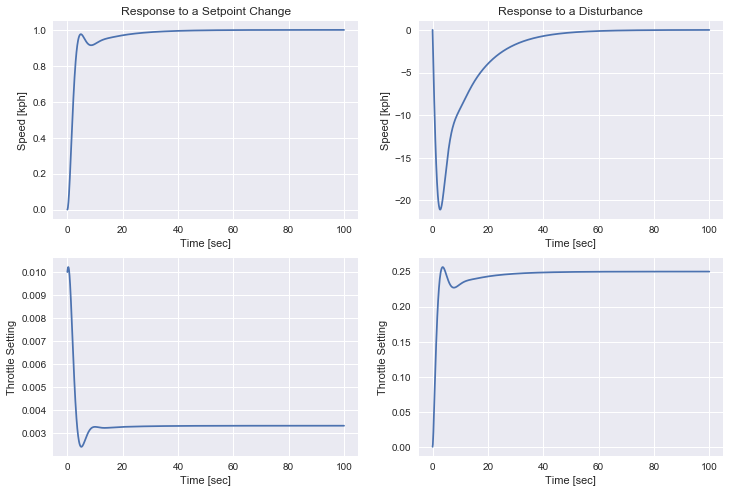

In [ ]:
t = np.linspace(0,100,1000)
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
yr,t = control.step(Hyr,t)
plt.plot(t,yr)
plt.xlabel('Time [sec]')
plt.ylabel('Speed [kph]')
plt.title('Response to a Setpoint Change')

plt.subplot(2,2,2)
yd,t = control.step(Hyd,t)
plt.plot(t,yd)
plt.xlabel('Time [sec]')
plt.ylabel('Speed [kph]')
plt.title('Response to a Disturbance')

plt.subplot(2,2,3)
ur,t = control.step(Hur,t)
plt.plot(t,ur)
plt.xlabel('Time [sec]')
plt.ylabel('Throttle Setting')

plt.subplot(2,2,4)
ud,t = control.step(Hud,t)
plt.plot(t,ud)
plt.xlabel('Time [sec]')
plt.ylabel('Throttle Setting')


## 5.2.5 Additional Examples

### 5.2.5.1 Internal Model Control

Internal model control is a version of feedback control that incorporates an explicit process model. A simple block diagram of internal model control is given by

![Internal Model Control](./figures/Internal_Model_Control.png)

There are two designated inputs, the reference $w$ and disturbance $y_d$, and three labeled signals $u$, $y$, and $d$ that appear relevant to closed-loop performance. Here's the solution for all six closed-loop transfer transfer functions:

| Output\Input | $w$ | $y_d$ |
| :----------: | :-: | :---: |
| $u$ | $\frac{Q}{1 + Q(G - G_m)}$ | $-\frac{Q}{1 + Q(G - G_m)}$ |
| $y$ | $\frac{GQ}{1 + Q(G - G_m)}$ | $\frac{1}{1 + Q(G - G_m)}$ |
| $d$ | $\frac{(G-G_m)Q}{1 + Q(G - G_m)}$ | $\frac{1}{1 + Q(G - G_m)}$ |


### 5.2.5.2 SEMD Figure 11-14

![Internal Model Control](figures/E11-10.png)


$$H_{yd} = \frac{G_3}{1+(G_2 + G_3G_1)K_cK_m}$$

$$H_{yr} = \frac{(G_2+G_3G_1)K_cK_m}{1+(G_2 + G_3G_1)K_cK_m}$$




# 5.3 Creating Bode Plots

This notebook demonstrate uss of the [Python Control Systems Library](https://github.com/python-control/python-control) to create and annotate Bode plots. Documentation of the control systems library is available [here](http://python-control.readthedocs.io/en/latest/).

## 5.3.1 Initializations

These are the standard initializations with the [Python Control Systems Library](https://github.com/python-control/python-control). 

The control library is imported with full prefix `control`.  This is good practice to avoid name conflicts with other libraries.

The control library has a bug where it continues to make use of the deprecated `hold` command from matplotlib. This results in warnings being issued. Use the warnings library to turn off these distracting warnings.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control

import warnings
warnings.filterwarnings('ignore')

## 5.3.2 Creating Bode Plots

### 5.3.2.1 Specify a Transfer Function

Given a transfer function with time delay

$$G(s) = 0.2 \frac{0.5s + 1}{1.5s^2 + 0.5 s + 1}$$

the first task to create an object representing the transfer function.

In [ ]:
# requires coefficients of the numerator and denominator polynomials
# the coefficients are given starting with the highest power of s

G = 0.2*control.tf([0.5,1],[1.5,0.5,1])
print(G)


    0.1 s + 0.2
-------------------
1.5 s^2 + 0.5 s + 1



### 5.3.2.2 Adding Time Delay

Time delay is a common feature of process control applications. The current version of the Python Control Systems Library does not provide a specific representation for time delay. However, the library does provide a function `pade` to create high-order Pade approximations to time delay.

$$G_p(s) = e^{-0.25s} G(s)$$

Here we add a third order pade approximation for a time delay of 0.25 time units.

In [ ]:
(num,den) = control.pade(0.25,3)
Gp = control.tf(num,den)*G
print(Gp)


        -0.1 s^4 + 4.6 s^3 - 86.4 s^2 + 576 s + 1536
-------------------------------------------------------------
1.5 s^5 + 72.5 s^4 + 1465 s^3 + 1.205e+04 s^2 + 4800 s + 7680



### 5.3.2.3 Bode Plot using Default Options

Function `control.bode()` returns values of the magnitude ratio, phase lag, and frequency (in rad/time) for a given transfer function. It also creates a bode plot as a side effect.

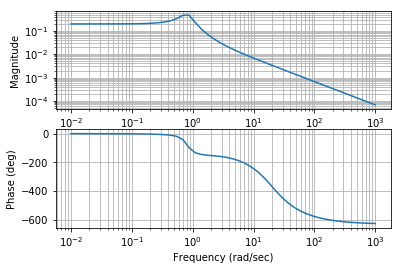

In [ ]:
mag,phase,omega = control.bode(Gp)

### 5.3.2.4 Specify Frequency Range

The default frequency range created by `bode` is often too wide. Use `numpy.logspace()` to Fortunately, it is possible to specify a desired set of frequencies at which to evaluate the Bode plot. The frequencies are always specified in radians per unit time.

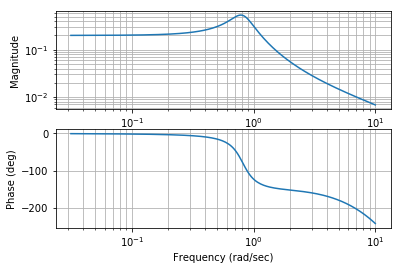

In [ ]:
w = np.logspace(-1.5,1,200)
mag,phase,omega = control.bode(Gp,w)

### 5.3.2.5 Setting Other Plotting Options

Bode plots can be customized with several key options as demonstrated in this cell. Note that setting `Hz = True` only changes the x-axis of the resulting bode plot, both input and output frequencies are still specified in radians per unit time.

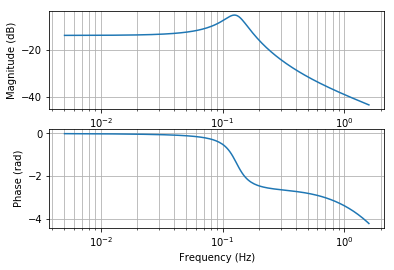

In [ ]:
mag,phase,omega = control.bode(Gp,w,Hz=True,dB=True,deg=False)

## 5.3.3 Adding Features to the Bode Plot

In addition to creating plots, the `bode` function returns numpy arrays containing the magnitude, phase, and frequency.  

### 5.3.3.1 Crossover Frequency and Gain at Crossover

This data can be used to annotate or add features to a Bode plot. The following cell interpolates the phase data to find the crossover frequency, then interpolates the magnitude data to find the gain at crossover.

Crossover freq =  5.042527421277537  rad/sec
Gain at crossover =  0.014611811647525856


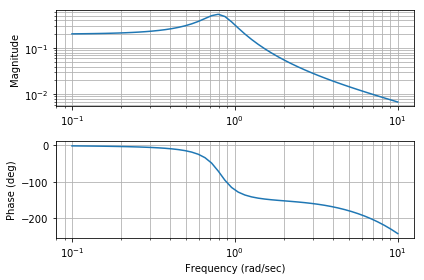

In [ ]:
w = np.logspace(-1,1)
mag,phase,omega = control.bode(Gp,w);
plt.tight_layout()

# find the cross-over frequency and gain at cross-over
wc = np.interp(-180.0,np.flipud(phase),np.flipud(omega))
Kcu = np.interp(wc,omega,mag)

print('Crossover freq = ', wc, ' rad/sec')
print('Gain at crossover = ', Kcu)

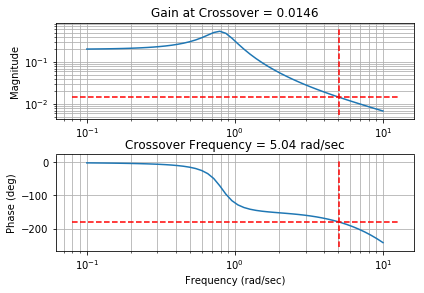

In [ ]:
mag,phase,omega = control.bode(Gp,w);
plt.tight_layout()

ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[Kcu,Kcu],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')
plt.title("Gain at Crossover = {0:.3g}".format(Kcu))

plt.sca(ax2)                 # phase plot
plt.plot(plt.xlim(),[-180,-180],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')
plt.title("Crossover Frequency = {0:.3g} rad/sec".format(wc))

# 5.4 Controller Tuning Rules in Frequency Domain

Demonstrate the use of a Bode plot for controller tuning. The notebook uses the [Python Control Systems Library](https://github.com/python-control/python-control).  

## 5.4.1 Closed-Loop Transfer Functions

### 5.4.1.1 Process Transfer Functions

The process output $y$ is modeled as the output of a linear system described by the transfer function 

$$y = G_p(s)G_v(s) u + G_d(s) d$$

where $G_p(s)$ is the process response to a manipulated variable, $G_v(s)$ is the transfer function of the actuator dynamics, and $G_d(s)$ is process response to a disturbance. The measured process output is given by

$$y_m = G_m(s) y$$

where $G_m(s)$ is the sensor transfer function. We assume the sensor has unit gain, i.e., $G_m(0) = 1$

### 5.4.1.2 Control Transfer Functions

The controller generates a command $u$ in response to the reference input $r$ and measured process output $y_m$. This is modeled as

$$u = G_r(s)r - G_y(s)y_m$$

where $G_r(s)$ and $G_y(s)$ are the controller transfer functions. Textbook simulations often set $G_r(s) = G_y(s)$ for PID control.  In practice, however, it is generally desireable to avoid excessive action in response to setpoint changes, so generally $G_r \neq G_y$.

Below we employ a parallel implementation of PID control for output feedback where

$$G_y(s) = K_p\left[ 1 + \frac{1}{\tau_Is} + \frac{\tau_D s}{\alpha\tau_Ds + 1}\right]$$

where parameter $\alpha$ limits excessive derivative action. Typical values of $\alpha$ are in the range 0.2 to 0.1.

For the reference signal, $G_r(s)$ has the same general form but with additional parameters $\beta$ and $\gamma$

$$G_r(s) = K_p\left[ \beta + \frac{1}{\tau_Is} + \gamma\frac{\tau_D s}{\alpha\tau_Ds + 1}\right]$$

Commonly $\gamma = 0$ to avoid derivative action on the reference signal. Parameter $\beta$ is typically set to a value $0\leq\beta\leq 1$ that balances prompt response to a setpoint against undue 'kicks' caused by sudden changes in setpoint.

### 5.4.1.3 Closed Loop Transfer Functions

The overall response of the closed-loop system is characterized by a set of four transfer functions relating the reference and disturbance inputs to the process output $y$ and the control command $u$.

$$\begin{align*}
y & = H_{yr}(s)r + H_{yd}(s)d \\
u & = H_{ur}(s)r + H_{ud}(s)d
\end{align*}
$$

The closed-loop transfer functions are given explicitly as 

$$H_{yr} = \frac{G_pG_vG_r}{1 + G_pG_vG_yG_m}$$

$$H_{yd} = \frac{G_d}{1 + G_pG_vG_yG_m}$$

$$H_{ur} = \frac{G_r}{1 + G_yG_mG_pG_v}$$

$$H_{ud} = -\frac{G_yG_mG_d}{1 + G_yG_mG_pG_v}$$

where the argument $s$ has been suppressed for brevity.

## 5.4.2 Example

We'll assume a process transfer function with time delay

$$G_p(s) = \frac{0.2}{s^2 + 1.5 s + 1}$$

and a disturbance response

$$G_d(s) = \frac{1}{s + 1}$$

and a measurement transfer function

$$G_m(s) = e^{-s}$$

We'll assume the dynamics of the actuator are negligible such that $G_v(s) = 1$. 

The Python Control Systems Library does not provide a specific representation for time delay. It does, however, provide a function `pade` for creating Pade approximations to time delay systems.

### 5.4.2.1 Entering Process Transfer Functions

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

Gp = tf([0.2],[1, 1.5, 1])
print("Gp = ", Gp)

Gd = tf([1],[1,1])
print("Gd = ", Gd)

Gv = tf([1],[1])
print("Gv = ", Gv)

(num,den) = pade(1.0,3)
Gm = tf(num,den)
print("Gm = ", Gm)

Gp =  
      0.2
---------------
s^2 + 1.5 s + 1

Gd =  
  1
-----
s + 1

Gv =  
1
-
1

Gm =  
-s^3 + 12 s^2 - 60 s + 120
--------------------------
s^3 + 12 s^2 + 60 s + 120



### 5.4.2.2 Finding Cross-Over Frequency and Gain at Cross-Over

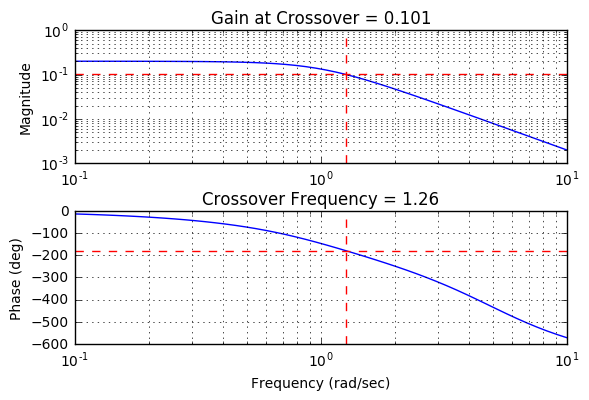

In [ ]:
w = np.logspace(-1,1)
mag,phase,omega = bode(Gp*Gm*Gv,w)
plt.tight_layout()

# find the cross-over frequency and gain at cross-over
wc = np.interp(-180.0,np.flipud(phase),np.flipud(omega))
gc = np.interp(wc,omega,mag)

# get the subplots axes
ax1,ax2 = plt.gcf().axes

# add features to the magnitude plot
plt.sca(ax1)
plt.plot([omega[0],omega[-1]],[gc,gc],'r--')
[gmin,gmax] = plt.ylim()
plt.plot([wc,wc],[gmin,gmax],'r--')
plt.title("Gain at Crossover = {0:.3g}".format(gc))

# add features to the phase plot
plt.sca(ax2)
plt.plot([omega[0],omega[-1]],[-180,-180],'r--')
[pmin,pmax] = plt.ylim()
plt.plot([wc,wc],[pmin,pmax],'r--')
plt.title("Crossover Frequency = {0:.3g}".format(wc))

### 5.4.2.3 Computing Ultimate Gain and Period

The conventional tuning rules for process control are written in terms of an ultimate gain $K_{cu}$ and ultimate period $P_u$. These are the values obtained by an experiment or calculation where the gain of a proportional only controller is increased until a steady closed-loop oscillation is first observed. The corresponding proportional gain is $K_{cu}$, and the period of oscillation is $P_u$.

These values may be computed from a Bode plot. The ultimate period corresponds to

$$P_u = \frac{2\pi}{\omega_c}$$

where $\omega_c$ is the cross-over frequency. The ultimate gain is then

$$K_{cu} = \frac{1}{G_p(\omega_c)}$$

where $G_p(\omega_c)$ is the open-loop process gain at the cross-over frequency.

In [ ]:
Kcu = 1.0/gc
Pu = 2.0*np.pi/wc

## 5.4.3 Ziegler-Nichols Tuning Rules

| Control | $K_p$       | $\tau_I$          | $\tau_D$        |
| :-----: | :---------: | :---------------: | :-------------: |
| P       | $0.5K_{cu}$ | $-$               | $-$             |
| PI      | $0.45K_{cu}$| $\frac{P_u}{1.2}$ | $-$             |
| PID     | $0.6K_{cu}$ | $\frac{P_u}{2}$   | $\frac{P_u}{8}$ |

In [ ]:
Kp = 0.6*Kcu
tauI = Pu/2.0
tauD = Pu/8.0

print("Ziegler-Nichols PID Tuning")
print("Kp   = {0:0.3g}".format(Kp))
print("tauI = {0:0.3g}".format(tauI))
print("tauD = {0:0.3g}".format(tauD))

Ziegler-Nichols PID Tuning
Kp   = 5.97
tauI = 2.48
tauD = 0.621


### 5.4.3.1 Interactive Tuning of a PID Controller

The following cell is initiated with the Ziegler-Nichols tuning for PID control. Interactive sliders can be adjusted to tune the controller for acceptable response.

<function __main__.f>

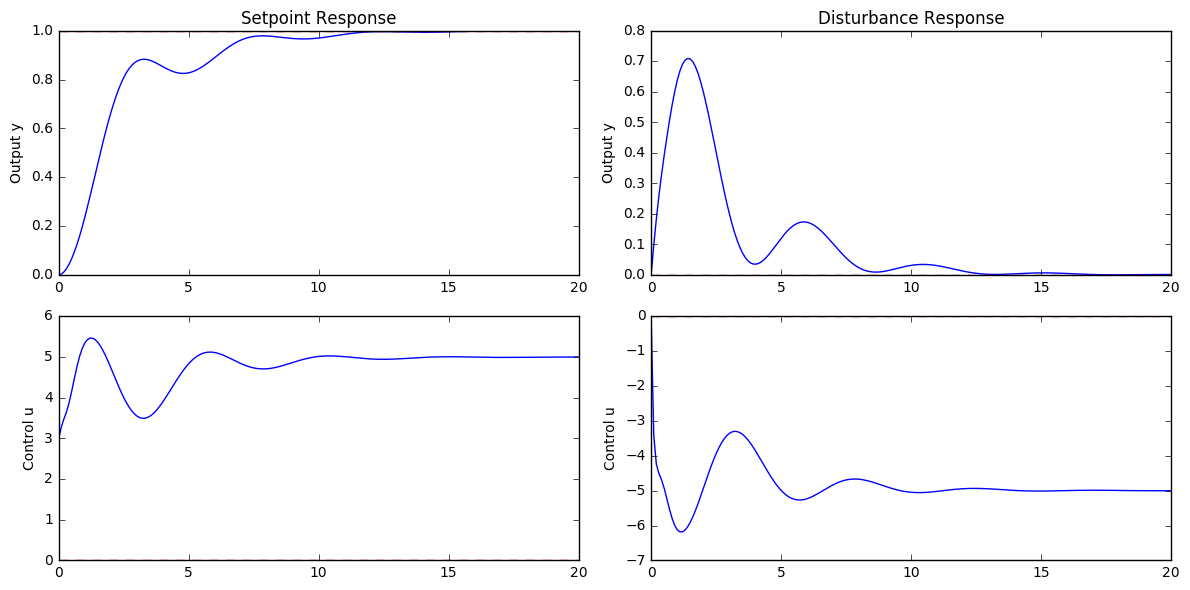

In [ ]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

def f(alpha=0.1,beta=0.5,gamma=0.0,Kp=0.6*Kcu,tauI=Pu/2.0,tauD=Pu/8.0):
    
    # parallel implementation of PID control
    P = Kp * tf([1.0],[1.0])
    I = (Kp/tauI) * tf([1.0],[1.0,0.0])
    D = Kp*tauD * tf([1.0,0.0],[alpha*tauD,1.0])

    # controller transfer functions
    Gr = beta*P + I + gamma*D
    Gy = P + I + D

    t = np.linspace(0,20,200)
    plt.figure(figsize=(12,6))

    yr,t = step(Gp*Gv*Gr/(1+Gp*Gv*Gy*Gm),t)
    plt.subplot(2,2,1)
    plt.plot(t,yr)
    plt.plot(plt.xlim(),[1.0,1.0],'r--')
    plt.title('Setpoint Response')
    plt.ylabel('Output y')

    yd,t = step(Gd/(1+Gp*Gv*Gy*Gm),t)
    plt.subplot(2,2,2)
    plt.plot(t,yd)
    plt.plot(plt.xlim(),[0.0,0.0],'r--')
    plt.title('Disturbance Response')
    plt.ylabel('Output y')

    ur,t = step(Gr/(1+Gy*Gm*Gp*Gv),t)
    plt.subplot(2,2,3)
    plt.plot(t,ur)
    plt.plot(plt.xlim(),[0.0,0.0],'r--')
    plt.ylabel('Control u')

    ud,t = step(-Gy*Gd/(1+Gy*Gm*Gp*Gv),t)
    plt.subplot(2,2,4)
    plt.plot(t,ud)
    plt.plot(plt.xlim(),[0.0,0.0],'r--')
    plt.ylabel('Control u')

    plt.tight_layout()
    
interact(f, 
         alpha=fixed(0.1), 
         Kp = (0.01*Kcu,Kcu),
         tauI = (Pu/20.0,Pu),
         tauD = (0.0,Pu),
         continuous_update=False)

In [ ]:
def h(a,b):
    print(a,b)

def g(Controller):
    interact(h,a=12.2,b=3.)
    return

interact(g, Controller=['P','PI','PID']);

12.2 3.0


# 5.5 Baroreflex as a Linear Control System

The [baroreflex](https://en.wikipedia.org/wiki/Baroreceptor) is one of several mechanisms in the body for maintaining arterial blood pressure (AP) at near constant levels. Specialized neurons, known as [baroreceptors](https://en.wikipedia.org/wiki/Baroreceptor), sense pressure through the stretching of the walls in key blood vessels. The signals are processed in the brainstem which, in turn, produces a compensating change in sympathetic and parasympathetic nervous system causing a response by the heart.  (Figure from Victor, 2015).

![baroreflex system](figures/nrcardio.2015.96-f2.jpg)

This notebook presents a linear control analysis of the closed-loop system consisting of a 'peripheral arc' from the sympathetic efferents connected to the heart tissue that cause the blood pressure to increase, and a corresponding 'neural arc' from the carotid baroreceptors sensing blood pressure to the sympathetic nervous response. Together these arcs comprise a closed-loop for the short-term control of blood pressure in the body (McLoone, 2014). 

This is diagrammed below in the form a closed loop control system

![baroreflex control diagram](figures/baroreflex.png)

where $AP$ refers to arterial blood pressure, and $SNA$ is the activity of the sympathetic nervous system correlated with response of the heart, $G_p$ represents the transfer function of the peripheral arc, and $G_c$ represents the transfer function of the neural (or control) arc.  The signal $p$ is placeholder for the influence of exogenous influences on blood pressure, such as a change in body body position. 

In [ ]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import control.matlab as control

sns.set_context('talk')

# needed to avoid a deprecation warning in the control library 
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

## 5.5.1 Peripheral Arc

Transfer function models for the 'peripheral arc', denoted $G_p(s)$ in the closed-loop diagram, have been measured for various animal models. For anesthesized rats, for example, Chapius et al., 2004, found

$$G_p(jf) = \left(\frac{K}{1 + 2\lambda(f/f_n) + (j(f/f_n))^2}\right)\exp\left(-2\pi Tjf\right)$$

where $j$ is the imaginary operator $\sqrt{-1}$, and $f$ is frequency in units of Hertz. Reported values for the parameters are given in the following table.

| Parameter | Description | $\qquad\qquad$ Value $\qquad\qquad$ | Conversion |
| :--: | :- | :-: | :-: |
| $K$ | static gain | $1.16 \pm 0.21$ mmHg/% SNA | $K_p \approx 1.16$ mmHg/% SNA|
| $f_n$ | natural frequency | $0.089\pm 0.007$ Hz | $\tau \approx 1.79$ sec |
| $\lambda$ | damping coefficient | $1.23\pm 0.14$ | $\zeta \approx 1.23$
| $T$ | fixed time delay | $0.476\pm 0.020$ sec | $t_d \approx 0.476$ |

Using the indicated conversions of values and parameters, the literature model is recast into standard transfer function notation

$$G_p(s) =  \left(\frac{K_p}{\tau^2 s^2 + 2\zeta\tau s + 1}\right)\exp\left(-t_d s\right)$$

The following cell implements this transfer function using the [Python Control Systems Library](https://pypi.python.org/pypi/control/0.7.0).

In [ ]:
Kp = 1.16                  # mmHg/%SNA
tau = 1.0/(2*0.089*np.pi)  # sec
zeta = 1.23
td = 0.476

Gp_ = control.tf([Kp],[tau**2,2*zeta*tau,1])
print('\nWithout Time Delay -->\n', Gp_)

num,den = control.pade(td,3)
Gp = Gp_ * control.tf(num,den)
print('\nWith a 3rd order Pade approximation for Time Delay -->\n', Gp)


Without Time Delay -->
 
          1.16
-----------------------
3.198 s^2 + 4.399 s + 1


With a 3rd order Pade approximation for Time Delay -->
 
           -1.16 s^3 + 29.24 s^2 - 307.2 s + 1291
------------------------------------------------------------
3.198 s^5 + 85.02 s^4 + 958.7 s^3 + 4748 s^2 + 5160 s + 1113



The following cell demonstrates the step response of the peripheral arc to a 1% change in $SNA$.

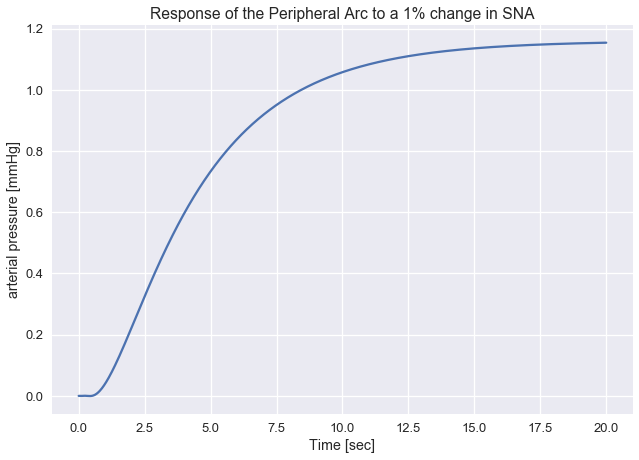

In [ ]:
t = np.linspace(0,20,1000)
y,t = control.step(Gp,t)
plt.plot(t,y)
plt.xlabel('Time [sec]')
plt.ylabel('arterial pressure [mmHg]')
plt.title('Response of the Peripheral Arc to a 1% change in SNA');

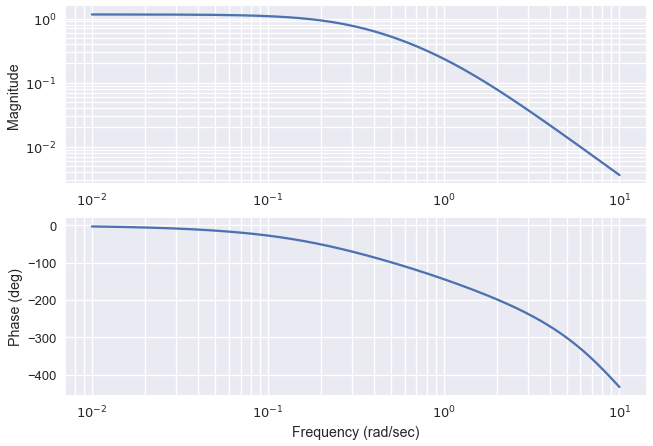

In [ ]:
w = np.logspace(-2,1,300)
mag,phase,w = control.bode(Gp,w)

## 5.5.2 P, PI, PD, and PID Control

Let's now consider how the baroreflex would behave if a controller were designed without regard to the underlying physiology.  For this purpose we'll consider the design of a PID control using tuning rules typical of practice in process control.

For coding convenience, we implement a utiity function that creates a transfer function for P, PI, PD, or PID control in standard form. The general expression is given by

$$ G_c^{PID}(s) = K_c\left[1 + \frac{1}{\tau_I s} + \frac{\tau_D s}{\alpha \tau_D s + 1}\right] $$

where the third term provides realizable derivative action. Parameter $\alpha \approx 0.1$ provides high-frequency roll-off of the derivative action.  When specialized and expressed over a common denominator, the specific forms of the controller become

\begin{align*}
G_c^{P} & = K_c \\
G_c^{PI} & = K_c \frac{\tau_Is + 1}{\tau_I s} \\
G_c^{PD} & = K_c \frac{(1+\alpha)\tau_D s + 1}{\alpha\tau_Ds + 1} \\
G_c^{PID} & = K_c\frac{(1+\alpha) \tau_I \tau_D s^2 + (\tau_I+\alpha\tau_D) s +  1}{\alpha \tau_I \tau_D s^2 + \tau_I s}
\end{align*}

In [ ]:
def PID(Kc=1,tauI=0,tauD=0):
    alpha = 0.1
    Gc = control.tf([1],[1])
    if tauI != 0:
        Gc += control.tf([1],[1,0])
    if tauD != 0:
        Gc += control.tf([tauD,0],[alpha*tauD,1])
    return Kc*Gc

def P(Kc=1):
    return PID(Kc,0,0)

def PI(Kc=1,tauI=0):
    return PID(Kc,tauI,0)

def PD(Kc=1,tauD=0):
    return PID(Kc,0,tauD)

PID(1,1,1)


1.1 s^2 + 1.1 s + 1
-------------------
    0.1 s^2 + s

### 5.5.2.1 Ziegler-Nichols Tuning

[Ziegler-Nichols tuning](https://en.wikipedia.org/wiki/Ziegler%E2%80%93Nichols_method) is a well known and widely used methods for determining an intial tuning of P, PI, PD, and PID controllers. The methods requires values of $K_{cu}$ (the proportional-only control gain at which a sustained oscillation is observed) and $P_u$ (the period of the observed oscillation). 

| Control Type | $K_p$ | $\tau_I$ | $\tau_D$ |
| :- | :-: | :-: | :-: |
| P | $0.5 K_u$ | - | - |
| PI | $0.45 K_u$ | $P_u$/$1.2$ | - |
| PD | $0.8 K_u$ | - | $P_u$/$8$ |
| classic PID | $0.6 K_u$ | $P_u$/$2$ | $P_u$/$8$ |
| Pessen Integral Rule | $0.7 K_u$ | $P_u$/$2.5$ | $3 P_u$/$20$ |
| some overshoot | $0.33 K_u$ | $P_u$/$2$ | $P_u$/$3$ |
| no overshoot | $0.2 K_u$ | $P_u$/$2$ | $P_u$/$3$ |

In the following cell, these values are obtained using the `margin` function from the Python Control Library, then verified by plotting a closed-loop step response using a proportional-only controller.

Ultimate Gain =  8.80991289154
Ultimate Period =  3.88965615063


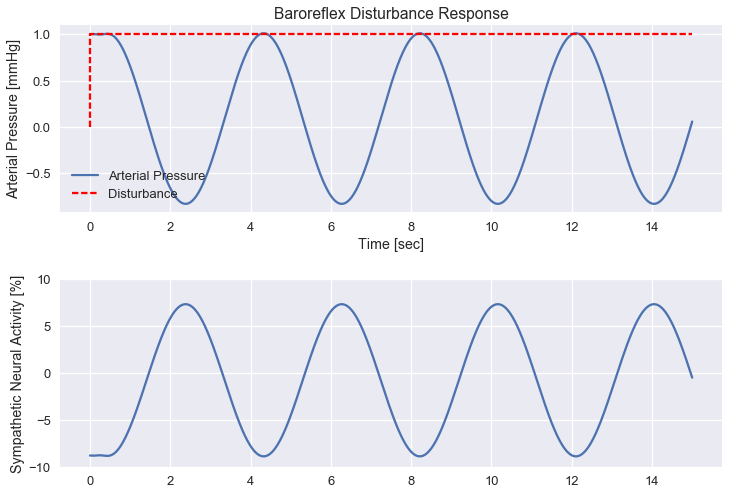

In [ ]:
gm,pm,Wcg,Wcp = control.margin(Gp)
Kcu = gm
Pu = 2*np.pi/Wcp

print('Ultimate Gain = ', Kcu)
print('Ultimate Period = ', Pu)

def stepResponse(Gp,Gc,t):
    y,t = control.step(1/(1+Gp*Gc),t)
    u,t = control.step(-Gc/(1+Gp*Gc),t)
    plt.subplot(2,1,1)
    plt.plot(t,y,[0,0,max(t)],[0,1,1],'r--')
    plt.xlabel('Time [sec]')
    plt.ylabel('Arterial Pressure [mmHg]')
    plt.title('Baroreflex Disturbance Response')
    plt.legend(['Arterial Pressure','Disturbance'],loc='lower left')
    plt.subplot(2,1,2)
    plt.plot(t,u)
    plt.ylim(-10,10)
    plt.ylabel('Sympathetic Neural Activity [%]')
    plt.tight_layout()
         
t = np.linspace(0,15,1000)
stepResponse(Gp,PID(Kcu,0,0),t)

### 5.5.2.2 Proportional-Derivative Control

Proportional-derivative control is generally associated with the suppression of peak overshoot in the disturbance response. The following shows the baroreflex response subject to PD control using a standard process control tuning rules.

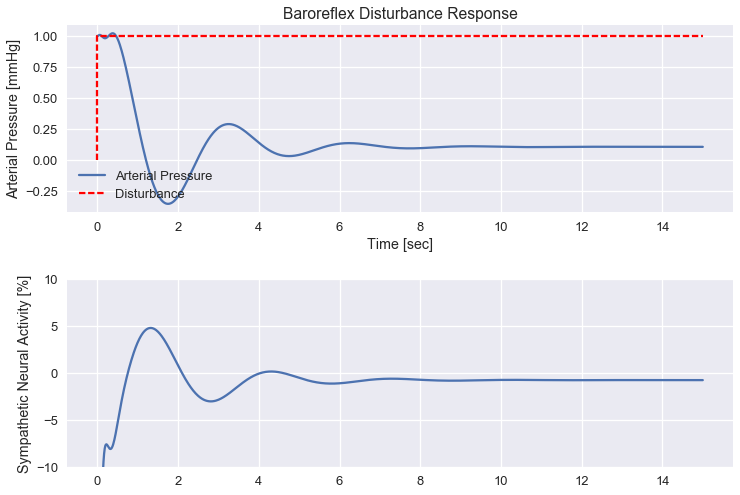

In [ ]:
Gc = PID(0.8*Kcu,0,Pu/8)
stepResponse(Gp,Gc,t)

### 5.5.2.3 Internal Model Control Tuning

Case J

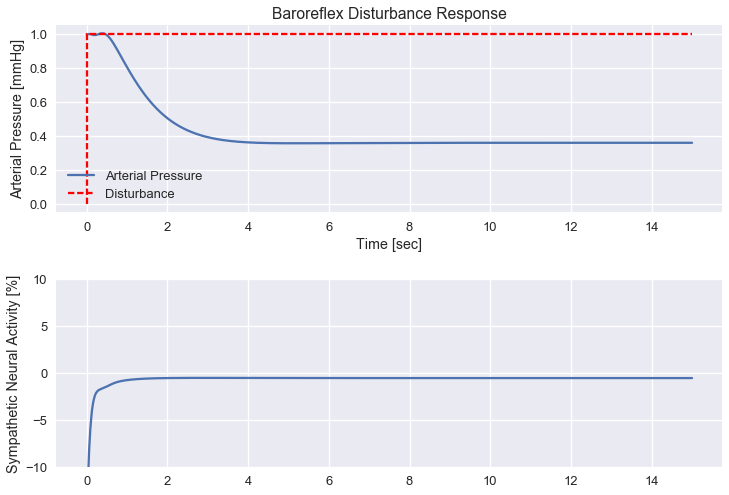

In [ ]:
tauC = 2
Kc = (2*zeta*tau)/(tauC + td)/Kp
tauI = 2*zeta*tau
tauD = tau/(2*zeta)

GcIMC = PID(Kc,0,tauD)
t = np.linspace(0,15,1000)
stepResponse(Gp,GcIMC,t)

## 5.5.3 Measured Physiological Response of Neural Arc

Petiot, et. al. (2001) (from the same laboratory cited above) provided laboratory measurements of the transfer function for the 'neural (or central) arc' for anesthesized rats. The results were given in the form

$$G_c^{Phys}(jf) = K\left(\frac{1+j(f/f_c)}{1 + 2\lambda j(f/fn)-(f/f_n)^2}\right)\exp\left(-2\pi jTf\right)$$

where $f$ is frequency in units of Hz. 

In the standard form for control engineering, the transfer function is written as

$$G_c^{Phys}(s) = K_c \frac{\tau_c s + 1}{\tau_n^2 s^2 + 2\lambda\tau_n s + 1} e^{-sT}$$

where $\tau = \frac{1}{2\pi f}$ and $s = 2\pi f$ are the conversions from frequency in Hz to time constant and Laplace variable $s$, respectively.

| Parameter | Description | $\qquad\qquad$ Value $\qquad\qquad$ | Conversion |
| :--: | :- | :-: | :-: |
| $K$ | static gain | 1.04 %SNA/mmHg | $K_c \approx$ 1.04 %SNA/mmHg|
| $f_c$ | corner frequency | 0.157 Hz | $\tau_c \approx$ 1.01 sec |
| $f_n$ | natural frequency | 1.12 Hz | $\tau_n \approx$ 0.142 sec |
| $\lambda$ | damping coefficient | 1.71 | $\zeta \approx$ 1.71 |
| $T$ | fixed time delay | 0.101 sec | $t_d \approx$ 0.101 sec|

1.0137257521776772 0.14210262776062083


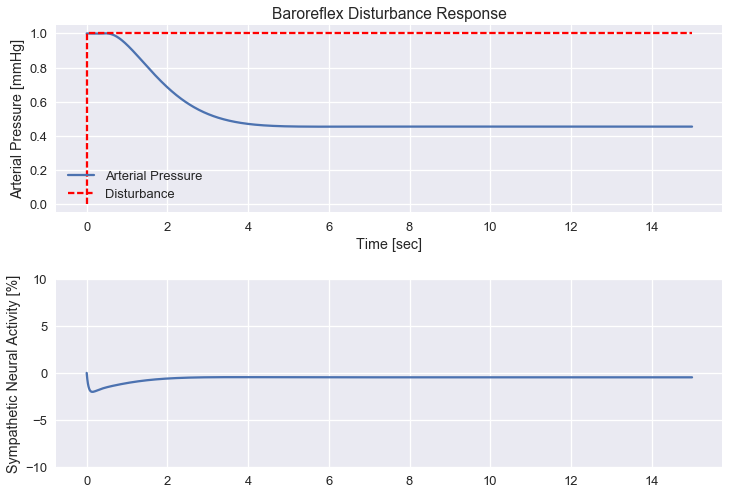

In [ ]:
fc = 0.157
fn = 1.12
K = 1.04
zetac = 1.71
tdelay = 1.01

tauc = 1/(2*np.pi*fc)
taun = 1/(2*np.pi*fn)

print(tauc,taun)

num,den = control.pade(tdelay,3)

GcPhys = K*control.tf([tauc,1],[taun**2,2*zetac*taun,1])
stepResponse(Gp,GcPhys,t)

## 5.5.4 Comparison of ZN Tuned PD Control to the Observed Physiological Response of the Neural arc

We observe a very different physiological behavior than what we naively predicted using a PD controller tuned using the Ziegler-Nichols rules.  To highlight these differences, the next cell compares the step responses of the two control laws

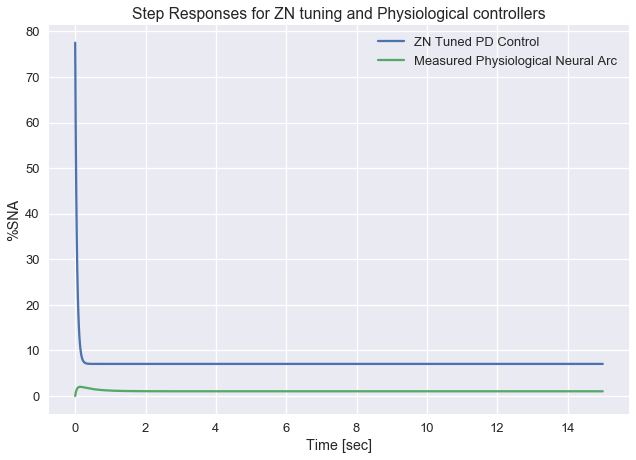

In [ ]:
u,t = control.step(Gc,t)
uPhys,t = control.step(GcPhys,t)
plt.plot(t,u,t,uPhys)
plt.xlabel('Time [sec]')
plt.ylabel('%SNA')
plt.title('Step Responses for ZN tuning and Physiological controllers')
plt.legend(['ZN Tuned PD Control','Measured Physiological Neural Arc']);

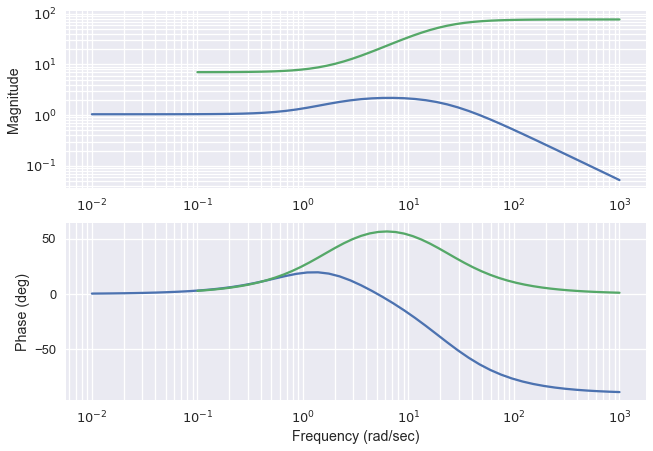

In [ ]:
control.bode(GcPhys);
control.bode(Gc);

## 5.5.5 Modifications to the PD Controller

Matching the Proportional-Derivative control law to the observed physiological response of the neural arc requires several modifications of the PD controller. The first step is to introduce a second-order filter to suppress the 'derivative kick' 

$$ G_c^{mod}(s) = K_c\left[1 + \frac{\tau_D s}{\alpha \tau_D s + 1}\right]\left[\frac{1}{\tau_n s + 1}\right]^2 $$

The second is to substantially reduce the control gain, and to slightly reduce the derivative time constant for a corresponding tuning $K_c = 0.12 K_{cu}$ and $\tau_D = P_u/6$. The following cells compares the computed baroreflex response with these modifications in place.

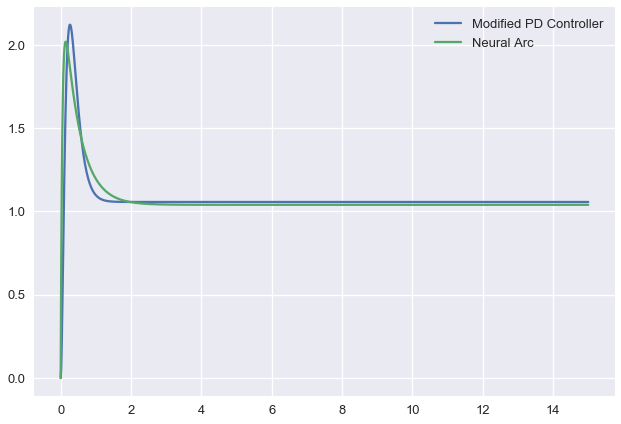

In [ ]:
Gc = PID(0.12*Kcu,0,Pu/6)
Gcf = Gc*(control.tf([1],[1*taun,1]))**2
uf,t = control.step(Gcf,t)

uPhys,t = control.step(GcPhys,t)

plt.plot(t,uf,t,uPhys)
plt.legend(['Modified PD Controller','Neural Arc']);

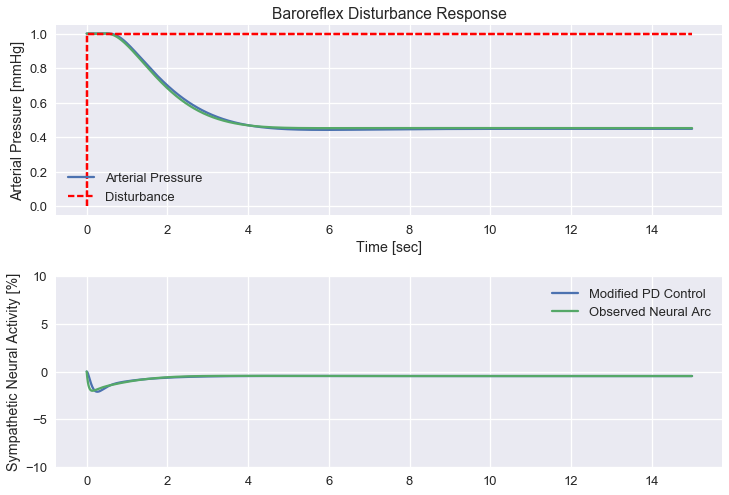

In [ ]:
stepResponse(Gp,Gcf,t)
stepResponse(Gp,GcPhys,t)
plt.legend(['Modified PD Control','Observed Neural Arc']);

## 5.5.6 Conclusions

To create a control response resembling the physiological response inferred from the cited papers, it was necessary to:

1. Introduce a filter to significantly reduce the 'derivative kick' associated with a standard PID control implementation.
2. Reduce the proportional gain by a factor of about 5 from a value that would be typically used in industrial process control.
3. There was no integral response observed in the physiologically consistent control.

### 5.5.6.1 References


Chapuis, Bruno et al. “Linear Modelling Analysis of Baroreflex Control of Arterial Pressure Variability in Rats.” The Journal of Physiology 559.Pt 2 (2004): 639–649. PMC. Web. 29 Mar. 2017. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1665118/

Kamiya, Atsunori et al. “Closed-Loop Spontaneous Baroreflex Transfer Function Is Inappropriate for System Identification of Neural Arc but Partly Accurate for Peripheral Arc: Predictability Analysis.” The Journal of Physiology 589.Pt 7 (2011): 1769–1790. PMC. Web. 28 Mar. 2017.  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3099029/

Roy Kanbar, Valérie Oréa, Bruno Chapuis, Christian Barrès, Claude Julien
American Journal of Physiology - Regulatory, Integrative and Comparative Physiology Nov 2007, 293 (5) R1938-R1946; DOI: 10.1152/ajpregu.00374.2007  http://ajpregu.physiology.org/content/293/5/R1938.short

McLoone, Violeta. "Modelling of Long and Short Term Blood Pressure Control Systems." PhD Thesis, NUI Maynooth, 2014.  http://eprints.maynoothuniversity.ie/5611/1/Thesis_V_McLoone-Final_Version.pdf

Petiot, Emmanuelle et al. “Frequency Response of Renal Sympathetic Nervous Activity to Aortic Depressor Nerve Stimulation in the Anaesthetized Rat.” The Journal of Physiology 537.Pt 3 (2001): 949–959. PMC. Web. 29 Mar. 2017. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2278997/

Victor, Ronald G. "Carotid baroreflex activation therapy for resistant hypertension." Nature Reviews Cardiology 12, 451–463 (2015) doi:10.1038/nrcardio.2015.96 http://www.nature.com/nrcardio/journal/v12/n8/full/nrcardio.2015.96.html

